In [1]:
import numpy as np
from PIL import Image
import scipy.ndimage
# import rasterio
# from osgeo import gdal
import cv2
import matplotlib.pyplot as plt

In [24]:
image_path = r'D:\Datasets\satellite\CVMI'
# image_name_old = r'\S2A_MSIL2A_20190104T051211_N0211_R019_T43PGQ_20190104T094623_quality_scene_classification.png'
image_name = r'\subset_1_of_S2A_MSIL2A_20190104T051211_N0211_R019_T43PGQ_20190104T094623_resampled_quality_scene_classification.tif'
# image_path = r'D:\Datasets\satellite\CVMI\subset_1_of_S2A_MSIL2A_20190104T051211_N0211_R019_T43PGQ_20190104T094623_resampled.data'
# image_name = r'\quality_scene_classification.img'

In [25]:
# dtype = np.dtype('>u2')
# shape = (809,809,1)
# image = np.fromfile(open(image_path+image_name, 'rb'), dtype).reshape(shape)
#image_raw.count
image_raw = cv2.imread(image_path+image_name,cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)

In [26]:
print(image.shape)

(809, 809, 3)


In [27]:
# image_resized = cv2.resize(image,dsize=(808, 808), interpolation=cv2.INTER_NEAREST)

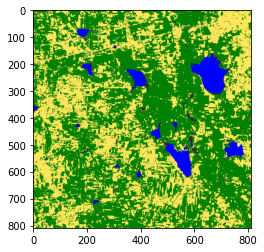

In [28]:
plt.imshow(image)
plt.show()

In [29]:
water_mask = [0,0,255]
#veg_mask = [0,128,0]
# water_mask = [6]
masked_image = [[0 for i in range(image.shape[0])] for j in range(image.shape[1])]

In [30]:
print(image[0][0])


[  0 128   0]


In [31]:
GET_MASK = True
count = 0
# if GET_MASK:
#     for row in range(image.shape[0]):
#         for col in range(image.shape[1]):
#             if image[row][col] == water_mask:
#                     masked_image[row][col] = 1
if GET_MASK:
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if image[row][col][0] == water_mask[0] and image[row][col][1] == water_mask[1] and image[row][col][2] == water_mask[2]:
                    masked_image[row][col] = 1            
print(count)

0


In [32]:
output_file = r'\water_mask_R019_T43PGQ'
output_path = r'D:\workspace\jupyterNotebooks\Remote Sensing\Water-Segmentation\data'

In [33]:
SAVE = True
if SAVE:
    np.save(output_path+output_file, masked_image)